# Applying Convolutional Neural Networks for classification of handwritten digits

## Abstract
The [MNIST dataset](http://yann.lecun.com/exdb/mnist/), i.e. images of handwriten digits to be recognized, is a standard dataset to illustrate the strengths of (deep) convolutional neural networks (CNNs). In this notebook we construct a 7-layer CNN (not counting the batch normalizations separately) with 3 pairs of a convolutional layer followed by max pooling, and a final fully connected layer with 10 outputs for each of the 10 digits.

## Introduction
The MNIST dataset consists of 70'000 monochrome pictures of pixel size 28 x 28 and is already split into a training set of 60'000 pictures and test set of 10'000 pictures.

The constructed CNN is a 7-layer network comprising
* a convolutional 2D layer: 10 filters of size 3 times 3 and stepsize 1 and 1,
* a max pooling layer: window size 2 times 2, stepsize 2 and 2,
* a convolutional 2D layer: 20 filters of size 3 times 3 and stepsize 1 and 1,
* a max pooling layer: window size 2 times 2, stepsize 1 and 1,
* a convolutional 2D layer: 40 filters of size 3 times 3 and stepsize 1 and 1,
* a max pooling layer: window size 2 times 2, stepsize 2 and 2,
* a fully connected layer.

We formulate the problem as a classification problem minimizing the categorical crossentropy and consider the resulting multi-class accuracy as metric.

In Section 0 we import all necessary modules and define the most relevant parameters. In Section 1 we load the MNIST dataset and plot some examples. Section 2 constructs the CNN and applies it on the MNIST dataset. Section 3 plots the accuracy history and the confusion matrix across all 10 digits, and Section 4 shows all wrongly classified images. Finally, Section 5 visualizes the activations of each layer for 3 different images.

## 0. Import modules, definition of parameters

In [1]:
# Notebook settings
###################

# resetting variables
get_ipython().magic('reset -sf') 

# formatting: cell width
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

# plotting
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Activation
from sklearn.metrics import confusion_matrix
import tensorflow as tf

validationRatio = 0.15
filterSize1 = 3
numberFilters1 = 10
filterSize2 = 3
numberFilters2 = 20
filterSize3 = 3
numberFilters3 = 40
numberEpochs = 10

Using TensorFlow backend.


## 1. Loading the MNIST dataset

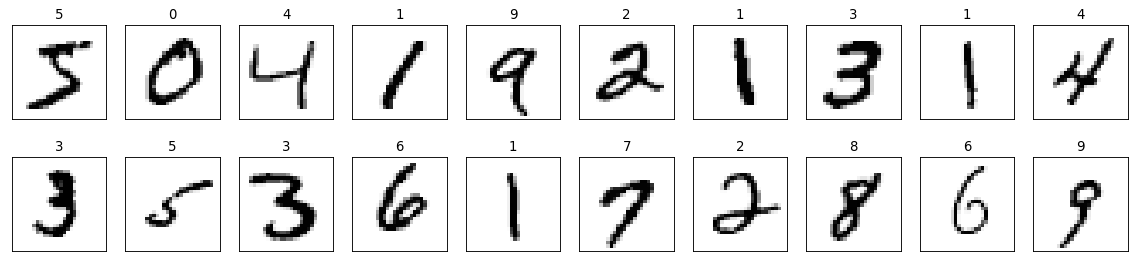

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data('C:/users/S4LJNO/Desktop/SAV FG/data/mnist.npz')

plt.figure(figsize=(18,4), dpi=80)
for j in range(20):
    plt.subplot(2,10,j+1)
    plt.imshow(trainX[j], cmap='Greys')
    plt.title(trainY[j])
    plt.xticks([])
    plt.yticks([])
    
trainX = np.reshape(trainX/255, (len(trainY),28,28,1))
testX = np.reshape(testX/255, (len(testY),28,28,1))
trainY = keras.utils.to_categorical(trainY)

## 2. Constructing and fitting the CNN

In [3]:
np.random.seed(0)
tf.random.set_seed(0)
cnn = Sequential()
cnn.add(Conv2D(filters=numberFilters1, 
             kernel_size=(filterSize1,filterSize1), 
             strides=(1,1),
             padding='valid'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')) 

cnn.add(Conv2D(filters=numberFilters2, 
             kernel_size=(filterSize2,filterSize2),
             strides=(1,1),
             padding='valid'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))  

cnn.add(Conv2D(filters=numberFilters3, 
             kernel_size=(filterSize3,filterSize3), 
             strides=(1,1),
             padding='valid'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))  

cnn.add(Flatten())
cnn.add(Dense(10))
cnn.add(Activation('softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

summary = cnn.fit(x=trainX, y=trainY, validation_split=validationRatio, epochs=numberEpochs, batch_size=64, verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 76s 1ms/step - loss: 0.1561 - accuracy: 0.9554 - val_loss: 0.0645 - val_accuracy: 0.9817
Epoch 2/10
51000/51000 [==============================] - 65s 1ms/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.0538 - val_accuracy: 0.9833
Epoch 3/10
51000/51000 [==============================] - 75s 1ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0422 - val_accuracy: 0.9880
Epoch 4/10
51000/51000 [==============================] - 66s 1ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0420 - val_accuracy: 0.9877
Epoch 5/10
51000/51000 [==============================] - 73s 1ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0328 - val_accuracy: 0.9899
Epoch 6/10
51000/51000 [==============================] - 63s 1ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.0312 - val_accuracy: 0.9907
Epoch 7/10
51000/51000 [==============================] - 67s 1ms/ste

## 3. Accuracy history and confusion matrix

Train accuarcy: 0.9965
Validation accuracy: 0.9904


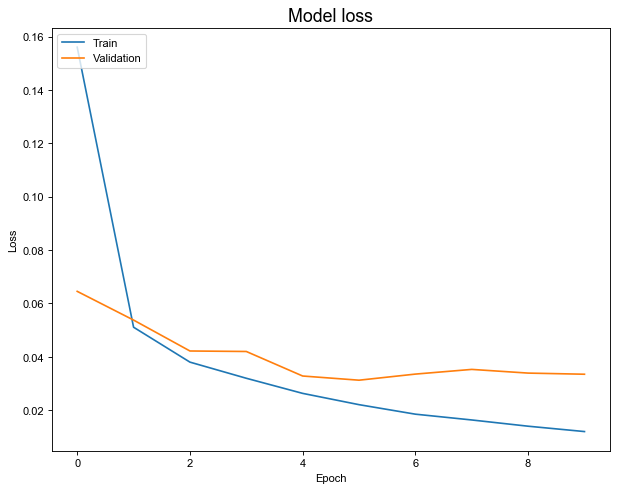

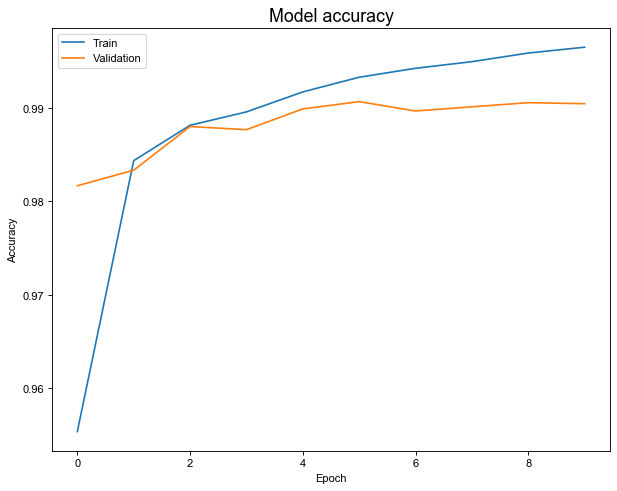

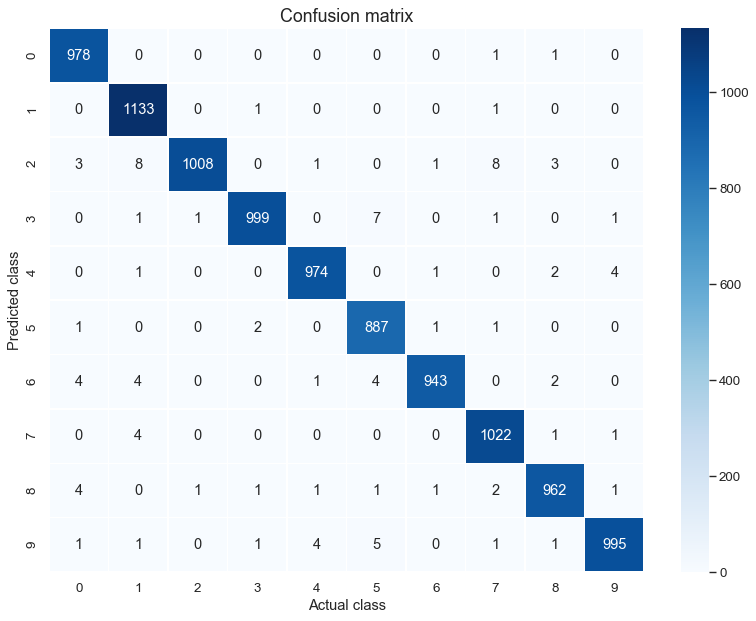

In [4]:
plt.figure(figsize=(9,7), dpi=80)
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.figure(figsize=(9,7), dpi=80)
plt.plot(summary.history['accuracy'])
plt.plot(summary.history['val_accuracy'])
plt.title('Model accuracy', fontsize=16)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.figure(figsize=(12,9), dpi=80)
sn.set(font_scale=1.1)
testP = cnn.predict_classes(testX)
ax = sn.heatmap(pd.DataFrame(confusion_matrix(testY, testP).astype(int),
                        range(10), range(10)), annot=True, fmt='d', linewidth=0.5, cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Actual class')
ax.set_ylabel('Predicted class')
ax.set_title('Confusion matrix', fontsize=16)

print('Train accuarcy: %.4f' % summary.history['accuracy'][-1])
print('Validation accuracy: %.4f' % summary.history['val_accuracy'][-1])

## 4. Wrongly classified images
All images where the actual image differs from the predicted image (denoted as A and P) are shown in this section.

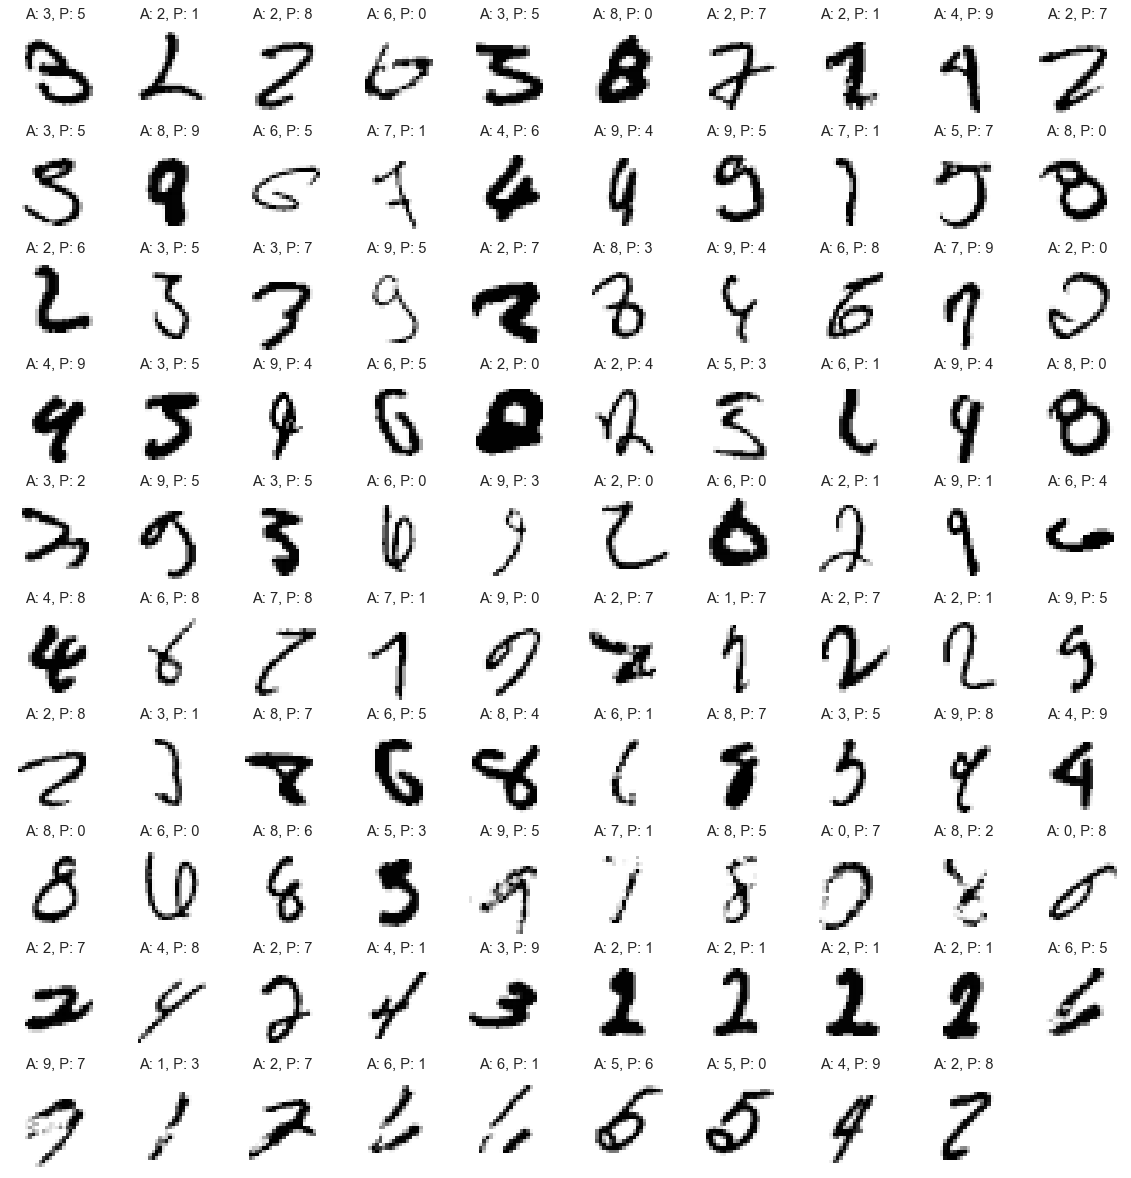

In [5]:
incorrectIdx = np.where(testY!=testP)[0]
plt.figure(figsize=(18,2*len(incorrectIdx)//10), dpi=80)
for j in range(len(incorrectIdx)):
    plt.subplot(len(incorrectIdx)//10+1,10,j+1)
    plt.imshow(testX[incorrectIdx[j],:,:,0], cmap='Greys')
    plt.title('A: '+ str(testY[incorrectIdx[j]])+', P: ' + str(testP[incorrectIdx[j]]))
    plt.xticks([])
    plt.yticks([])

## 5. Visualization of activations of each layer
Visualizing the activations of the convolutional and max pooling layers as image provides some insights into the mechanics of the CNN.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 20)        1820      
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 20)        80        
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 20)       

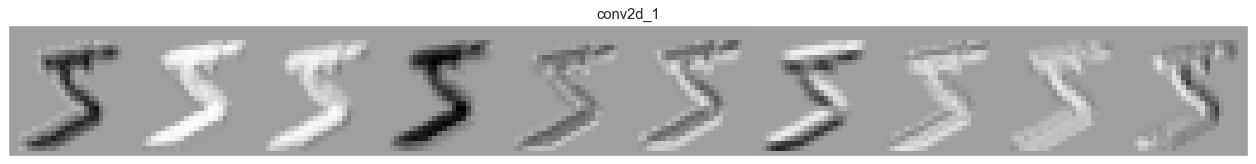

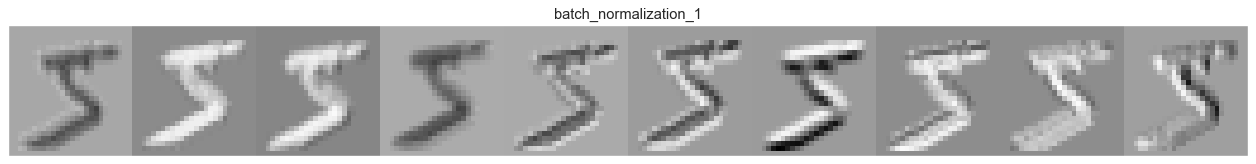

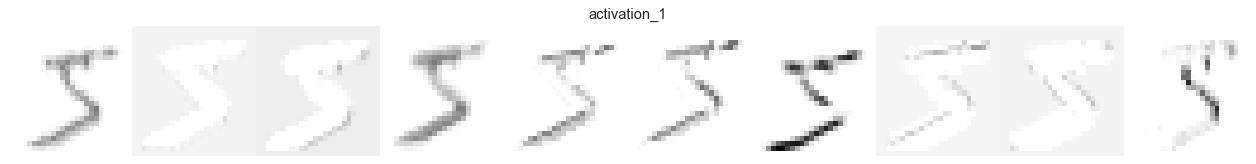

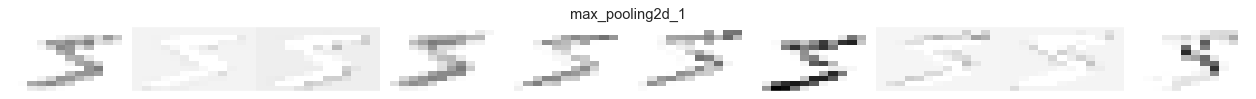

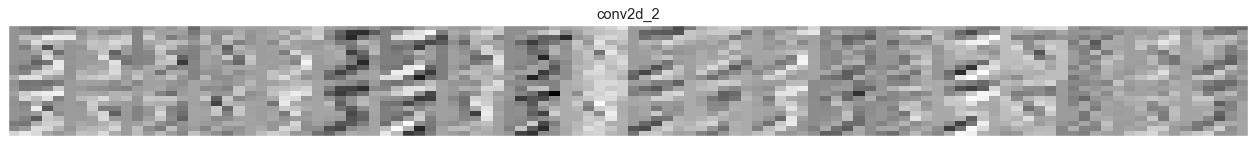

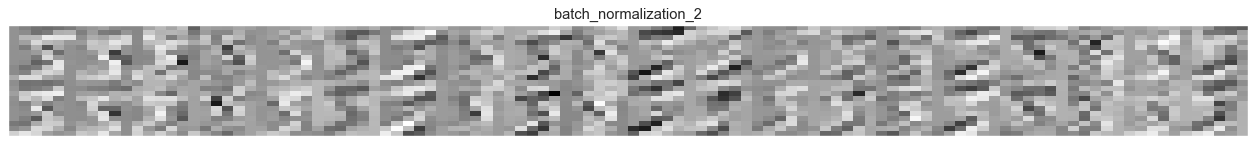

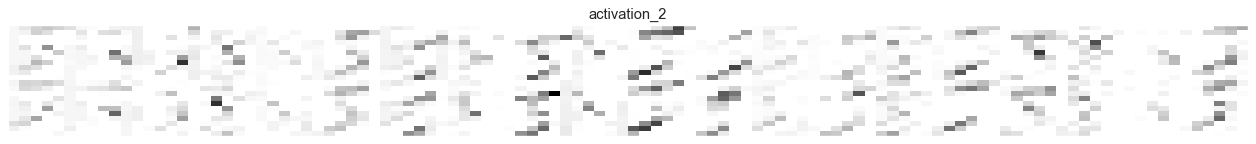

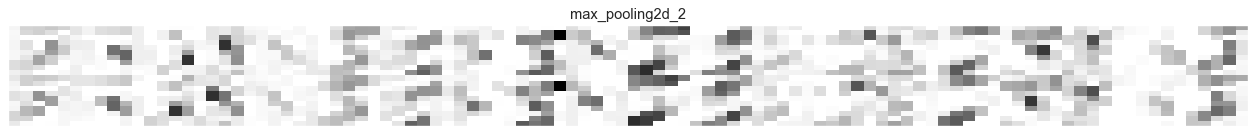

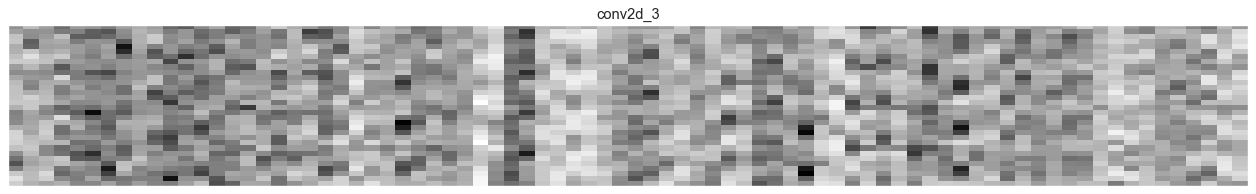

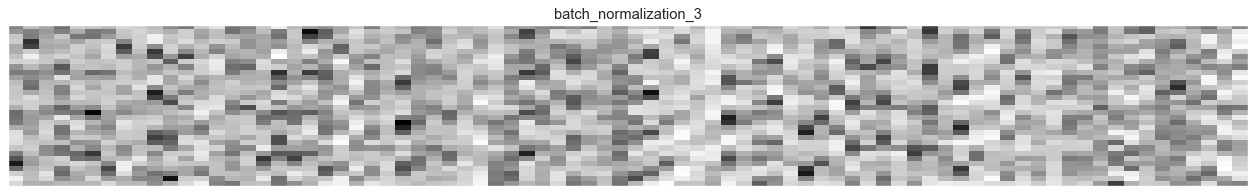

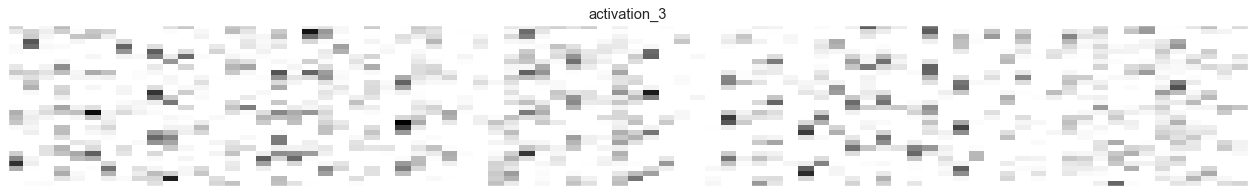

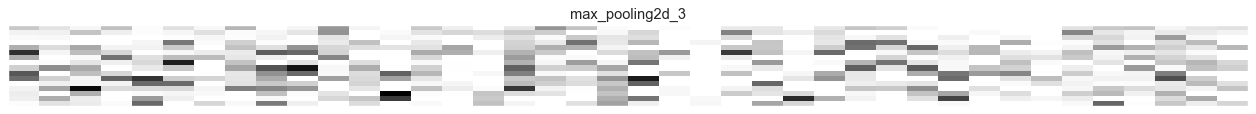

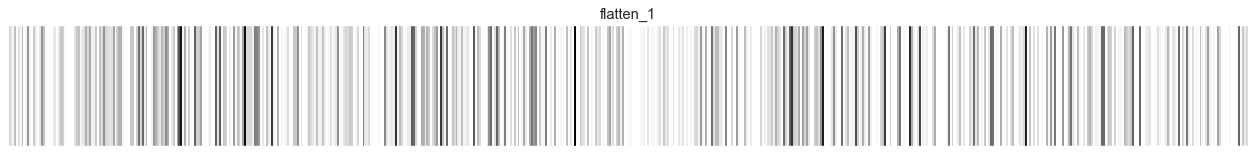

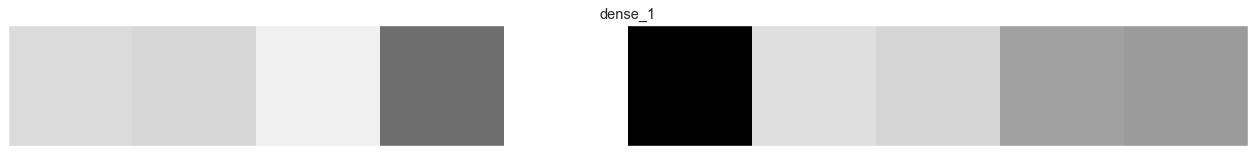

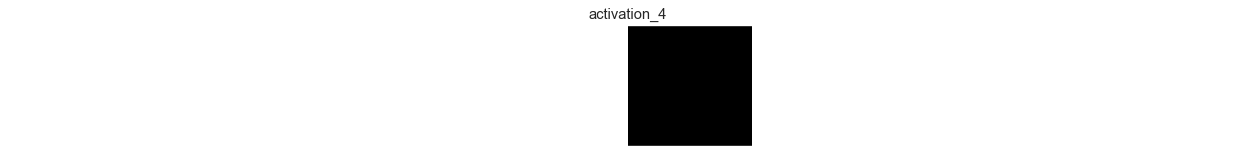

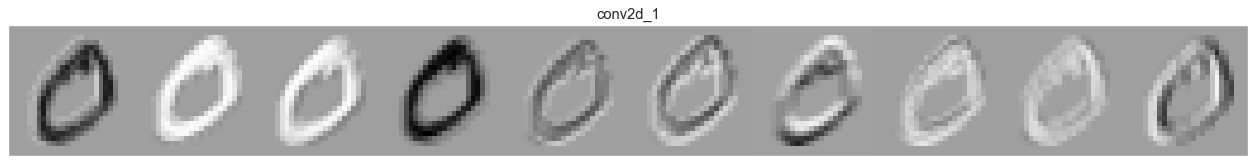

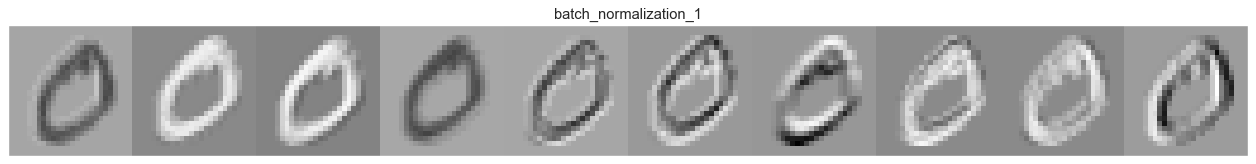

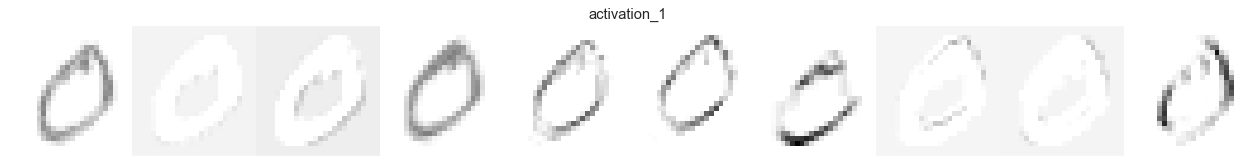

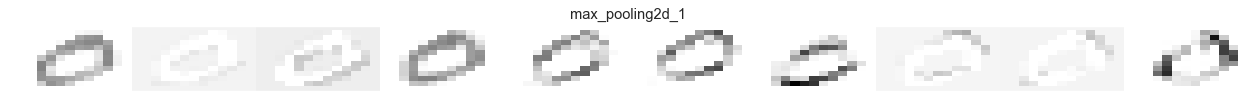

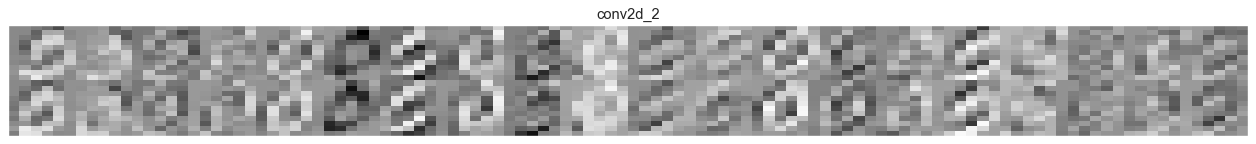

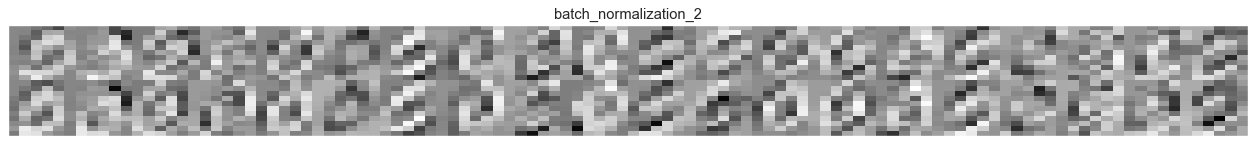

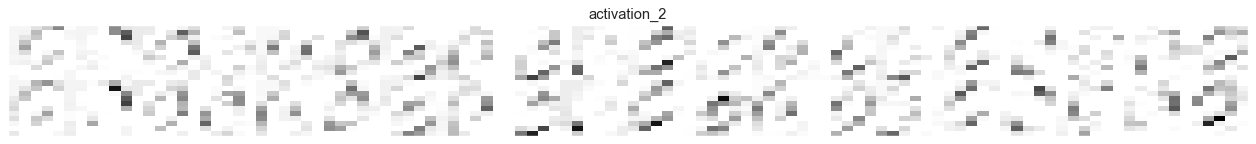

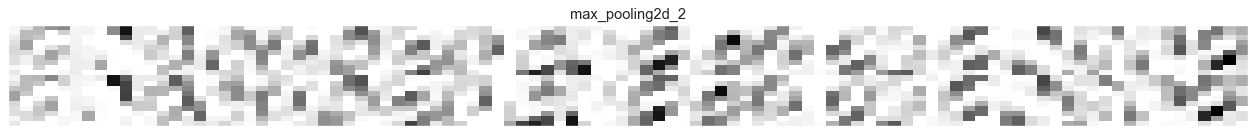

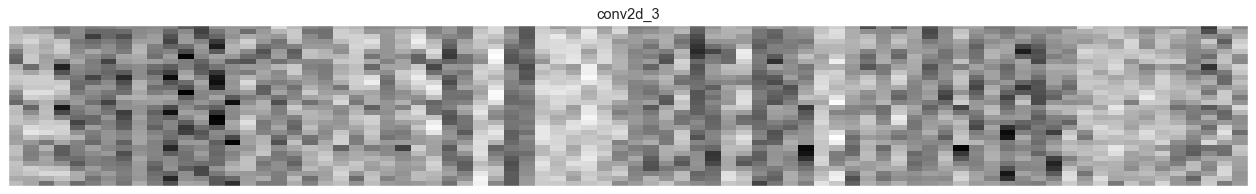

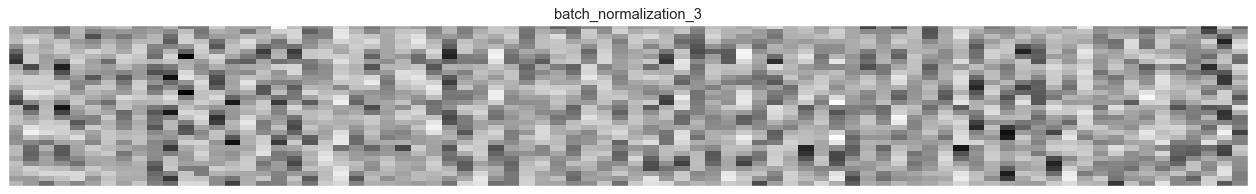

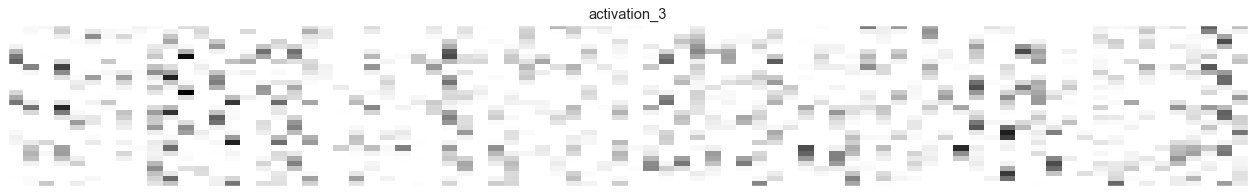

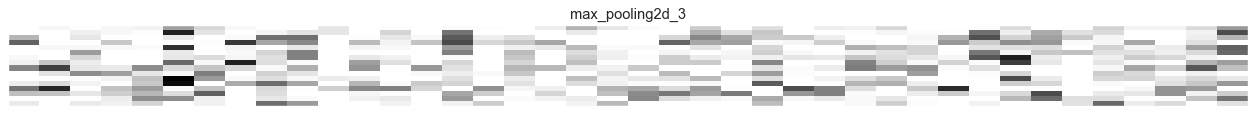

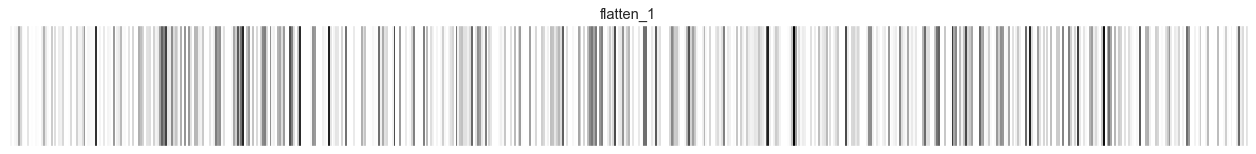

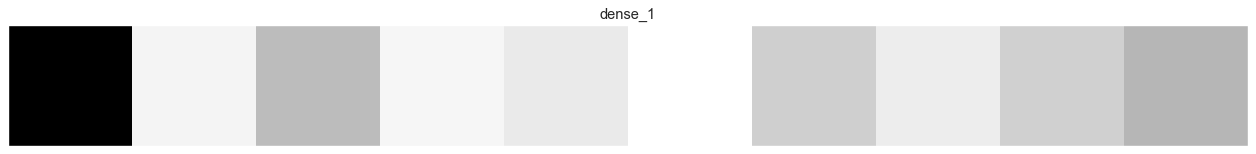

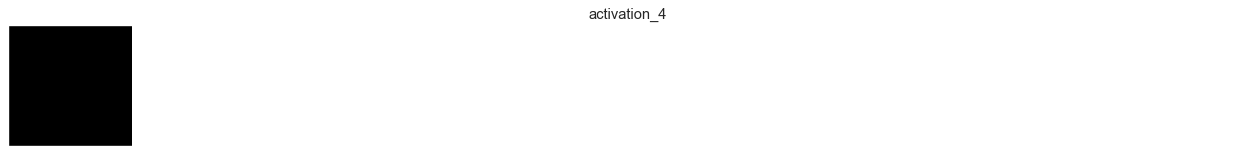

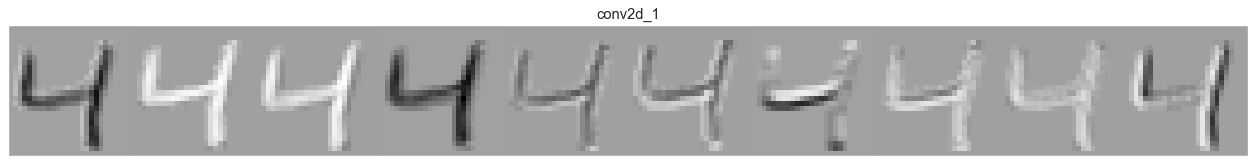

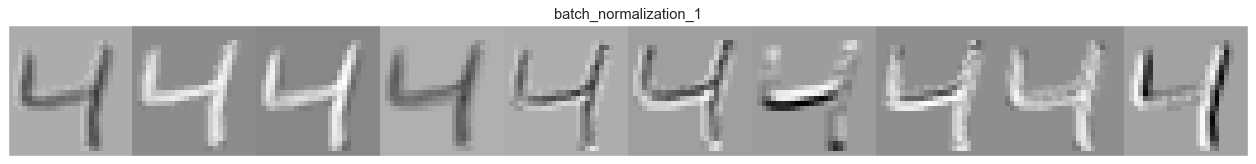

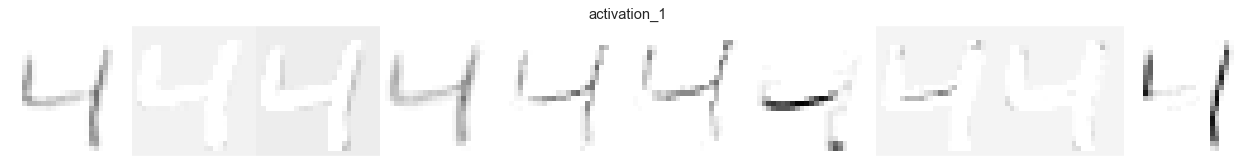

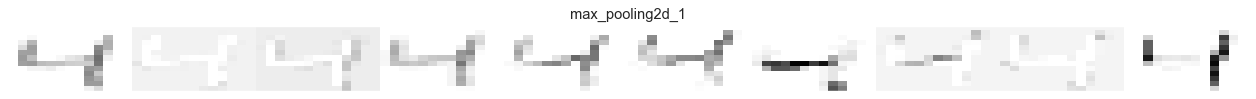

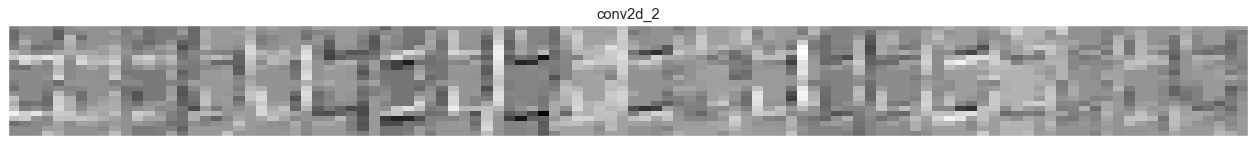

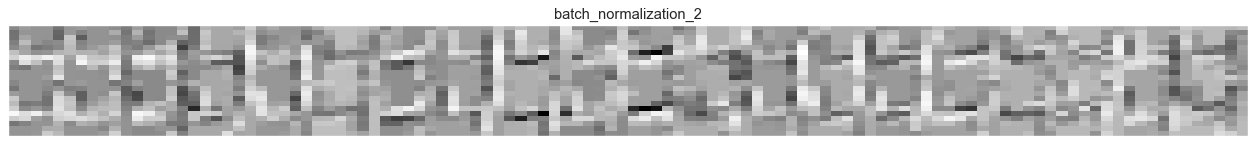

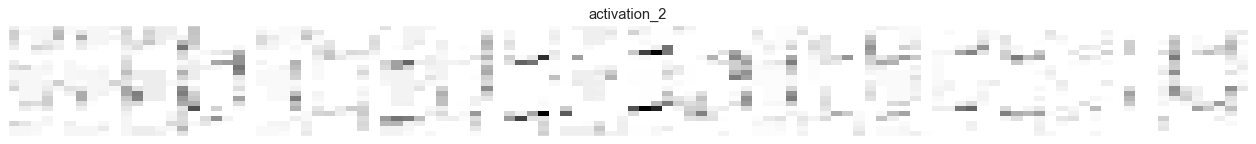

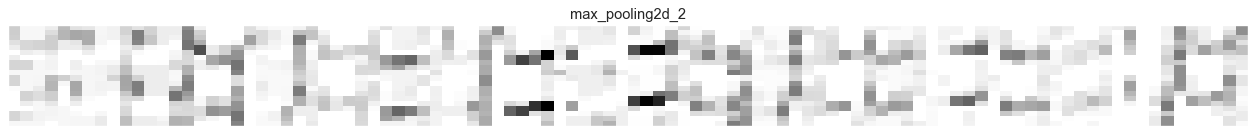

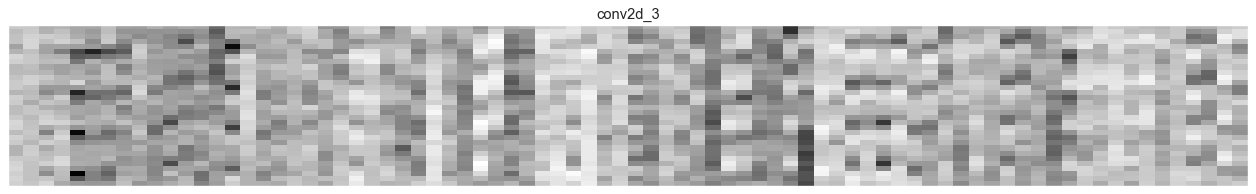

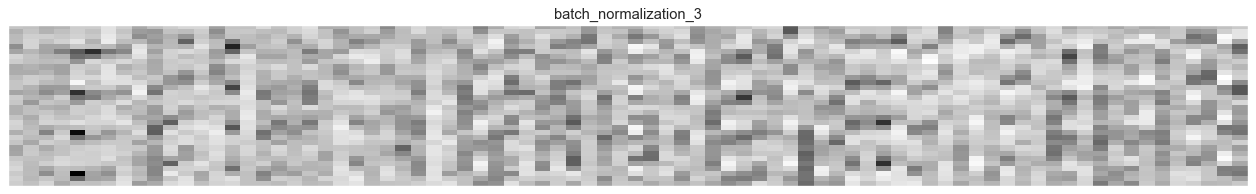

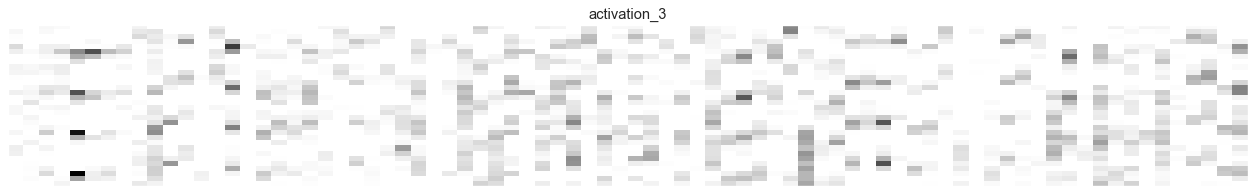

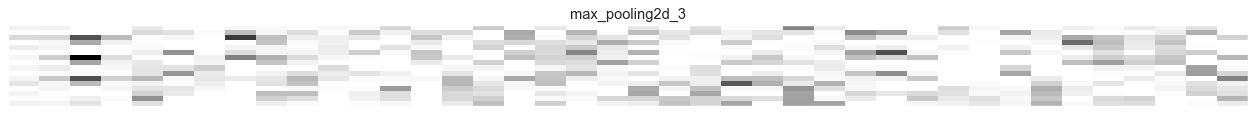

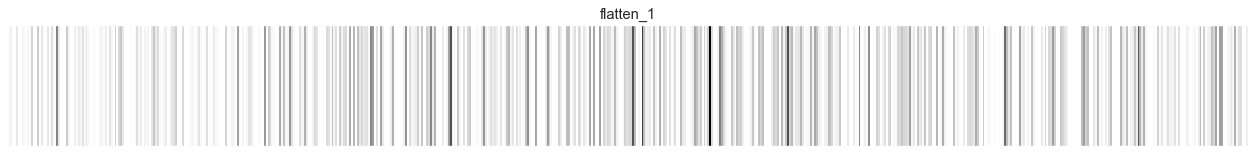

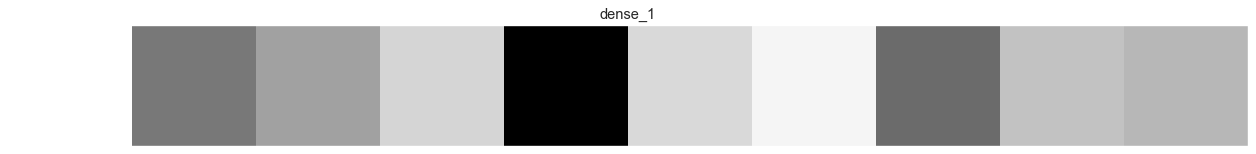

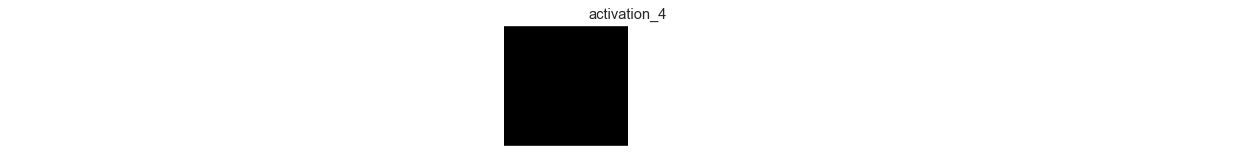

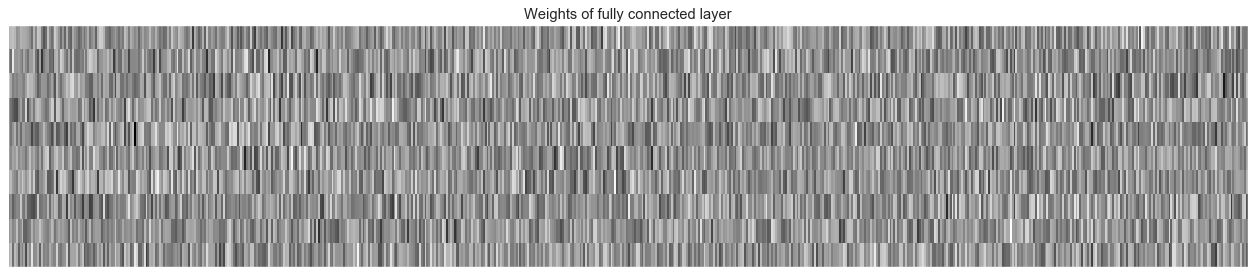

In [6]:
print(cnn.summary())
layerModel = Model(cnn.input,[layer.output for layer in cnn.layers])
plt.rcParams.update({'figure.max_open_warning': 0})

for j in range(3):
    layerActivations = layerModel.predict(trainX[j][np.newaxis,:,:,:])
    for k in range(len(layerActivations)):
        activation = layerActivations[k]               
        if activation.ndim>2:
            layerImage = activation.reshape(activation.shape[1]*activation.shape[-1]//10,
                            activation.size*10//activation.shape[1]//activation.shape[-1], order='f')
            plt.figure(figsize=(20,layerImage.shape[0]/12), dpi=80)
        else:
            layerImage = activation.reshape(1,activation.size)
            plt.figure(figsize=(20,2), dpi=80)
        layerImage = (layerImage-np.min(layerImage))/(np.max(layerImage)-np.min(layerImage))
        plt.title(cnn.layers[k].name)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(layerImage, aspect='auto', cmap='Greys')
        
weightImage = np.transpose(cnn.get_weights()[18])
weightImage = (weightImage-np.min(weightImage))/(np.max(weightImage)-np.min(weightImage))
plt.figure(figsize=(20,4), dpi=80)
plt.title('Weights of fully connected layer')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(weightImage, aspect='auto', cmap='Greys');    

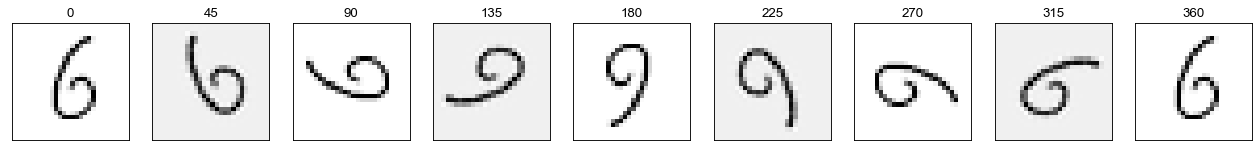

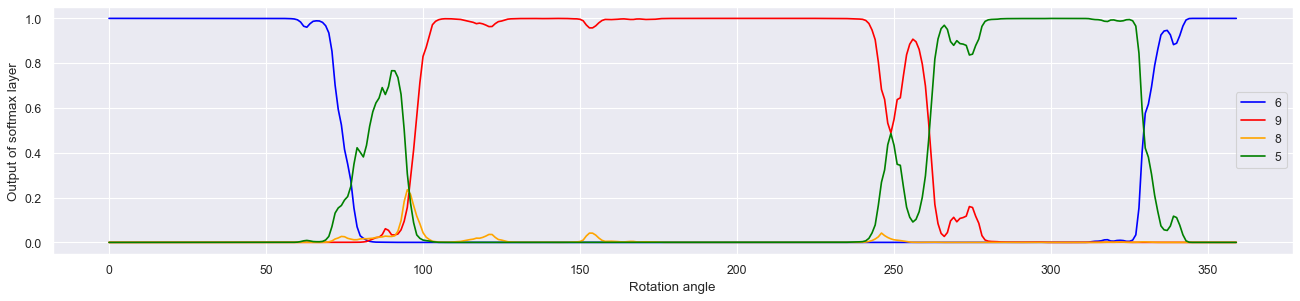

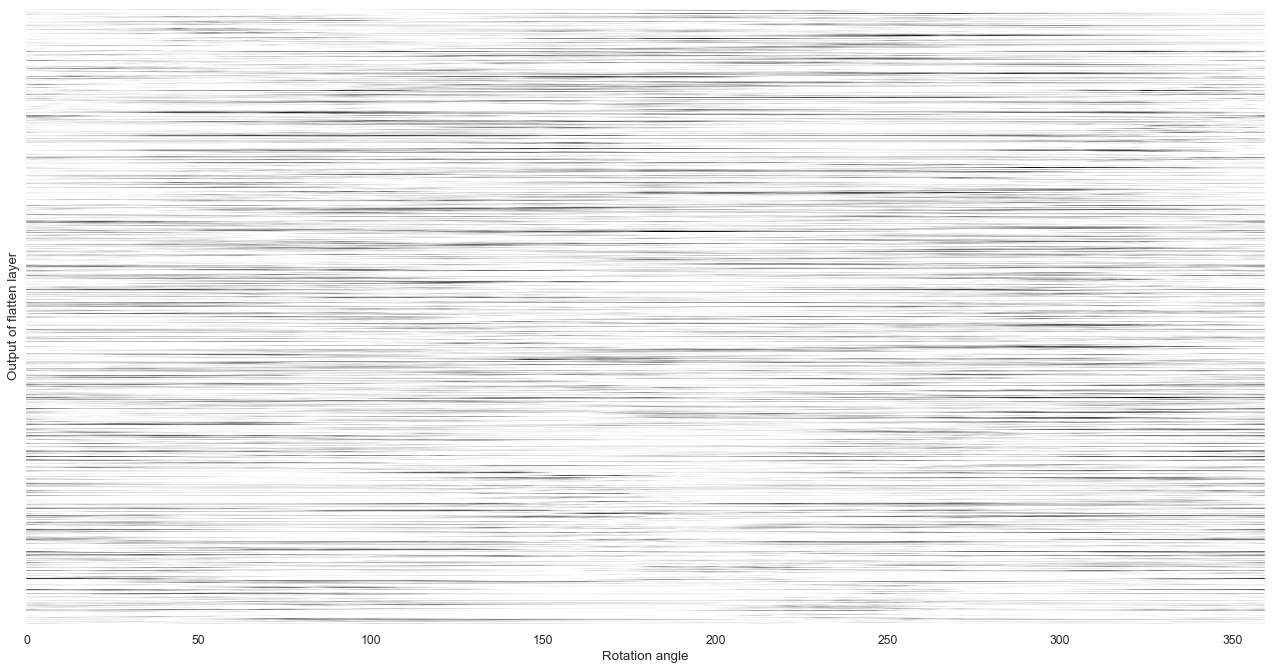

In [7]:
from scipy import ndimage
img = trainX[18];

plt.figure(figsize=(20,2), dpi=80)
sn.reset_defaults()
for p in range(0,405,45):
    plt.subplot(1,9,p/45+1)
    plt.imshow(ndimage.rotate(img[:,:,0], p, reshape=False), cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    plt.title(p)
sn.set()
activationSoftMax = np.zeros((360,10))
activationFlatten = np.zeros((640,360))
for p in range(360):
    imgRotated = ndimage.rotate(img, p, reshape=False)
    layerActivations = layerModel.predict(imgRotated[np.newaxis,:,:,:])    
    activationSoftMax[p,:] = list(layerActivations[14][0])
    activationFlatten[:,p] = list(layerActivations[12][0])
plt.figure(figsize=(20,4), dpi=80)
plt.plot(activationSoftMax[:,6], color='blue', label='6')
plt.plot(activationSoftMax[:,9], color='red', label='9')
plt.plot(activationSoftMax[:,8], color='orange', label='8')
plt.plot(activationSoftMax[:,5], color='green', label='5')
plt.xlabel('Rotation angle')
plt.ylabel('Output of softmax layer')
plt.legend();
activationFlatten = (activationFlatten-np.min(activationFlatten))/(np.max(activationFlatten)-np.min(activationFlatten))
plt.figure(figsize=(20,10), dpi=80)
plt.xlabel('Rotation angle')
plt.ylabel('Output of flatten layer')
plt.yticks([])
plt.grid(False)

plt.imshow(activationFlatten, aspect='auto', cmap='Greys');    

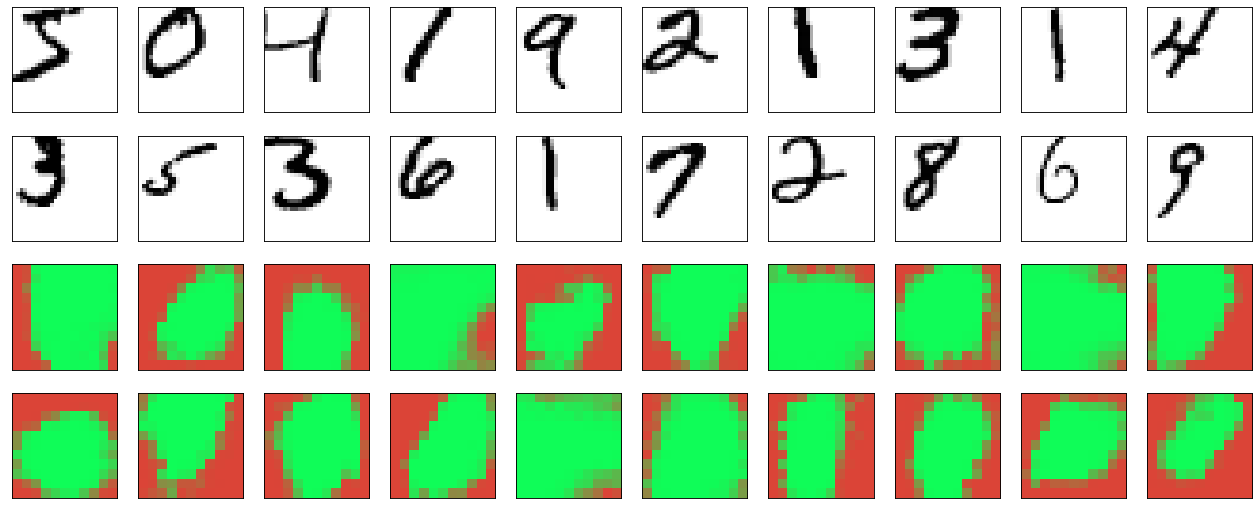

In [19]:
plt.figure(figsize=(20,8), dpi=80)
sn.reset_defaults()
from matplotlib.colors import LinearSegmentedColormap
redGreen = LinearSegmentedColormap.from_list('redGreen', [(219/255, 68/255, 55/255), (15/255, 253/255, 88/255)], N=256)
for i in range(20):
    img = trainX[i];
    activationSoftMax = np.zeros((121,10))
    for j in range(121):
        imgShifted = ndimage.shift(img, (j%11-5, j//11-5, 0), mode='constant', cval=0)
        layerActivations = layerModel.predict(imgShifted[np.newaxis,:,:,:])    
        activationSoftMax[j,:] = list(layerActivations[14][0])
        if j==0:
            upperLeft = imgShifted
    plt.subplot(4,10,i+1)    
    plt.imshow(upperLeft[:,:,0], cmap='Greys')
    plt.xticks([])
    plt.yticks([])              
    plt.subplot(4,10,i+21)
    plt.imshow(np.reshape(activationSoftMax[:,np.where(trainY[i])[0][0]],(11,11)), cmap=redGreen)
    plt.xticks([])
    plt.yticks([]);

C:\ProgramData\Anaconda3-2019.10\lib\site-packages\scipy\ndimage\interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


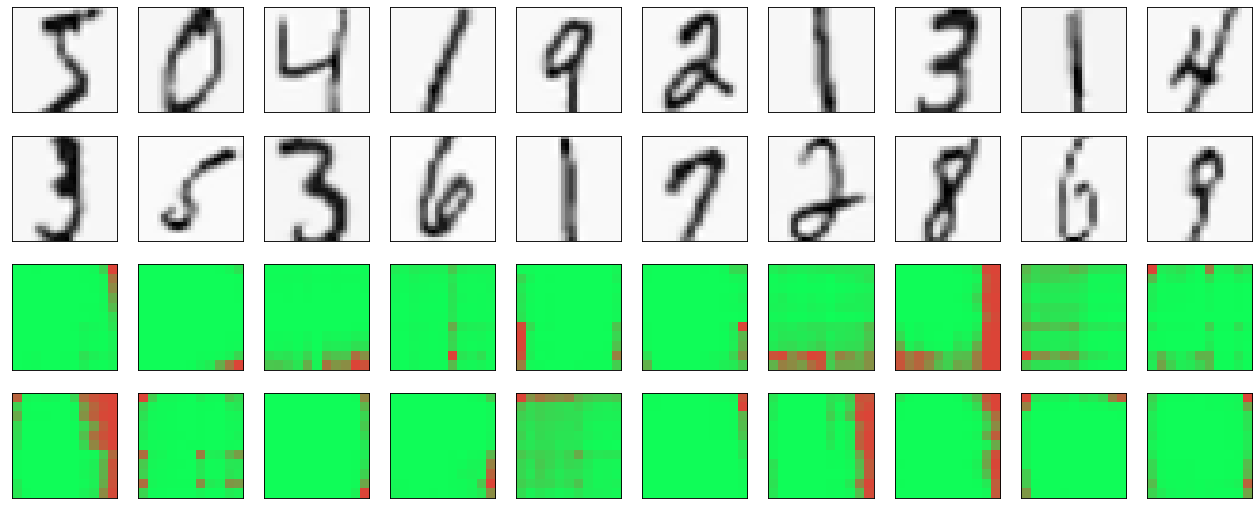

In [20]:
from skimage.transform import resize
plt.figure(figsize=(20,8), dpi=80)
for i in range(20):
    img = trainX[i];
    activationSoftMax = np.zeros((121,10))
    for j in range(121):
        imgZoomed = ndimage.zoom(img, ((j%11-5)/10+1, (j//11-5)/10+1, 1), mode='constant', cval=0)
        if imgZoomed.shape[0]>28:
            imgZoomed = imgZoomed[imgZoomed.shape[0]//2-14:imgZoomed.shape[0]//2+13,:]
        if imgZoomed.shape[1]>28:
            imgZoomed = imgZoomed[:,imgZoomed.shape[1]//2-14:imgZoomed.shape[1]//2+13]
        imgZoomed = resize(imgZoomed, (28,28,1))
        if j==10:
            lowerLeft = imgZoomed
        layerActivations = layerModel.predict(imgZoomed[np.newaxis,:,:,:])    
        activationSoftMax[j,:] = list(layerActivations[14][0])    
    plt.subplot(4,10,i+1)    
    plt.imshow(lowerLeft[:,:,0], cmap='Greys')
    plt.xticks([])
    plt.yticks([])    
    plt.subplot(4,10,i+21)
    plt.imshow(np.reshape(activationSoftMax[:,np.where(trainY[i])[0][0]],(11,11)), cmap=redGreen)
    plt.xticks([])
    plt.yticks([]);

In [21]:
pred = cnn.predict(trainX);

In [22]:
from keras.layers import Reshape, UpSampling2D
tf.random.set_seed(0)
cnni = Sequential()
cnni.add(Dense(49))
cnni.add(Activation('relu'))
cnni.add(Reshape((7,7,1)))
cnni.add(Conv2D(filters=20, kernel_size=(3,3), strides=(1,1), padding='same'))
cnni.add(Activation('relu'))
cnni.add(UpSampling2D((2,2)))
cnni.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), padding='same'))
cnni.add(Activation('relu'))
cnni.add(UpSampling2D((2,2)))
cnni.add(Conv2D(filters=1, kernel_size=(2,2), strides=(1,1), padding='same'))
cnni.compile(loss='binary_crossentropy', optimizer='adadelta')
cnni.fit(x=pred, y=trainX, validation_split=validationRatio, epochs=2, batch_size=64, verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/2
51000/51000 [==============================] - 75s 1ms/step - loss: 0.2820 - val_loss: 0.2465
Epoch 2/2
51000/51000 [==============================] - 71s 1ms/step - loss: 0.2450 - val_loss: 0.2364


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 49)                539       
_________________________________________________________________
activation_8 (Activation)    (None, 49)                0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 1)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 20)          200       
_________________________________________________________________
activation_9 (Activation)    (None, 7, 7, 20)          0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 10)       

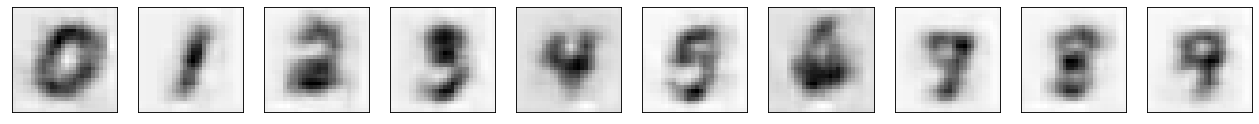

In [23]:
plt.figure(figsize=(20,2), dpi=80)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(cnni.predict(keras.utils.to_categorical(i,10)[np.newaxis,:])[0,:,:,0],cmap='Greys')
    plt.xticks([])
    plt.yticks([])
print(cnni.summary())